<a href="https://colab.research.google.com/github/FerizkiPutraAlfasa/Tugas_10_Python/blob/main/Tugas_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [263]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [264]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [265]:
print("[INFO] loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

[INFO] loading images...


In [266]:
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((224, 224))) / 255.0
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [267]:
print(labels)

['coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 

In [268]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [271]:
print(labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [274]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(711, 224, 224, 3)
(237, 224, 224, 3)


In [281]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(224*224*3,)),
        Dense(200, activation="relu", name="layer1"),
        Dense(32, activation="relu", name="layer2"),
        Dense(32, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [282]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 150528)            0         
_________________________________________________________________
layer1 (Dense)               (None, 200)               30105800  
_________________________________________________________________
layer2 (Dense)               (None, 32)                6432      
_________________________________________________________________
layer3 (Dense)               (None, 32)                1056      
_________________________________________________________________
layer4 (Dense)               (None, 3)                 99        
Total params: 30,113,387
Trainable params: 30,113,387
Non-trainable params: 0
_________________________________________________________________


In [283]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32, callbacks=[es, checkpoint])

[INFO] training network...
Epoch 1/50
23/23 [==============================] - ETA: 0s - loss: 19.7074 - accuracy: 0.3530WARNING:tensorflow:Model was constructed with shape (None, 150528) for input Tensor("flatten_16_input:0", shape=(None, 150528), dtype=float32), but it was called on an input with incompatible shape (None, 224, 224, 3).

Epoch 00001: val_accuracy did not improve from 0.71308
23/23 [==============================] - 5s 198ms/step - loss: 19.7074 - accuracy: 0.3530 - val_loss: 4.2247 - val_accuracy: 0.5527
Epoch 2/50
23/23 [==============================] - ETA: 0s - loss: 2.7950 - accuracy: 0.6048
Epoch 00002: val_accuracy did not improve from 0.71308
23/23 [==============================] - 4s 181ms/step - loss: 2.7950 - accuracy: 0.6048 - val_loss: 2.7912 - val_accuracy: 0.6118
Epoch 3/50
23/23 [==============================] - ETA: 0s - loss: 1.4639 - accuracy: 0.6456
Epoch 00003: val_accuracy did not improve from 0.71308
23/23 [==============================] - 4s

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


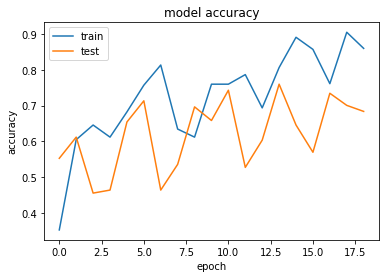

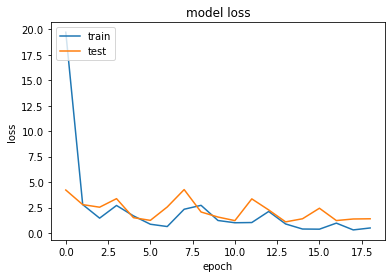

In [284]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [285]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.72      0.85      0.78        94
      forest       0.82      0.73      0.77        81
     highway       0.76      0.66      0.71        62

    accuracy                           0.76       237
   macro avg       0.77      0.75      0.75       237
weighted avg       0.76      0.76      0.76       237



In [286]:
model.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [291]:
import cv2
import matplotlib.pyplot as plt
image1='hqdefault.jpg'

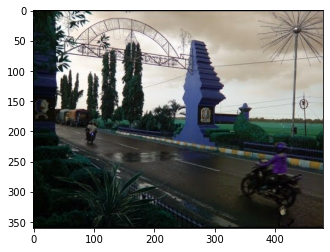

In [292]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()

In [299]:
image_testing = Image.open('hqdefault.jpg')
image_testing = np.array(image_testing.resize((224, 224))) / 255.0
image_testing.shape

(224, 224, 3)

In [300]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 224, 224, 3)


In [301]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[9.355915e-01 5.809632e-04 6.382757e-02]]
['coast']
